This just loads the libraries for plotting and computing with arrays, etc.

In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'

Populating the interactive namespace from numpy and matplotlib


Generate some time samples at random spacing (close to $\delta t = 0.1$, but with some jitte):

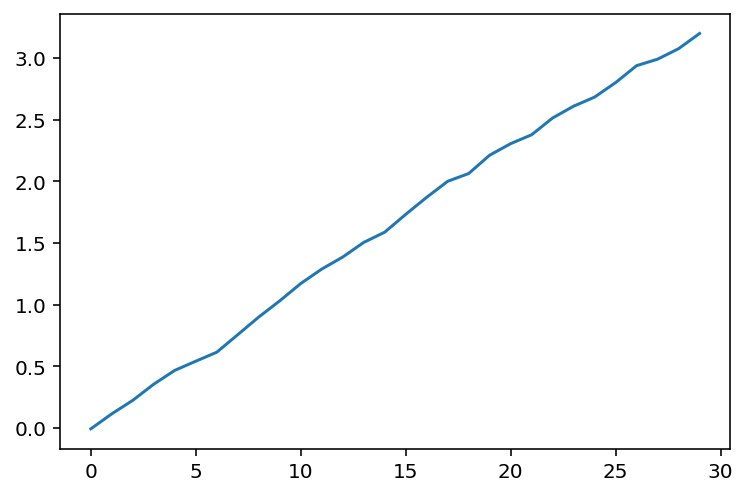

In [2]:
N = 30
ts = cumsum(0.1 + np.random.uniform(low=-0.05, high=0.05, size=N))-0.1
plot(ts)

Then we generate a signal with these fixed parameters:

In [3]:
A_true = 1.2
B_true = 0.5
mu_true = 0.23

sigma = 1.0 + random.uniform(low=-0.5, high=0.5, size=N)

ys_true = mu_true + A_true*cos(2*pi*ts) + B_true*sin(2*pi*ts)

From here, loop.  First, generate a data set by adding a draw of random noise to the signal:

c:\software\python\python3.7.4\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


[18.84452005 21.14159043 29.82590737 22.36271164 17.90675386 24.59628609
 28.13187791 20.24958284 27.5317743  45.67927205 25.37173152 20.02547587
 21.97323256 20.34083694 33.92059202 21.7239543  31.61681853 15.6330464
 31.69000514 30.61397345 27.60533054 13.50499577 22.09488164 28.40096878
 27.99030952 23.6494206  25.55795829 29.79018399 21.12498306 34.62126765
 32.74108671 19.93390528 16.60161194 13.27093383 19.60838326 45.17467782
 33.21961988 22.69507906 21.78265413 24.92662121 35.79973517 24.69042816
 31.00893453 31.73813375 38.31436063 42.77384705 24.6965771  22.48759484
 19.94654221 36.4034904  25.85698337 22.55107865 28.10961472 21.70804301
 29.6135167  24.49412187 13.68694131 13.64746611 33.17803008 22.25536553
 28.34346627 24.1475372  28.41230969 16.46854437 13.86141981 27.91380783
 24.5766836  26.42303798 22.67382276 32.06762352 35.2123112  20.69827531
 26.64845952 30.87437035 24.76274201 17.82605526 23.66976991 21.06880054
 24.02787581 17.04137016 22.78974985 35.2765312  18.

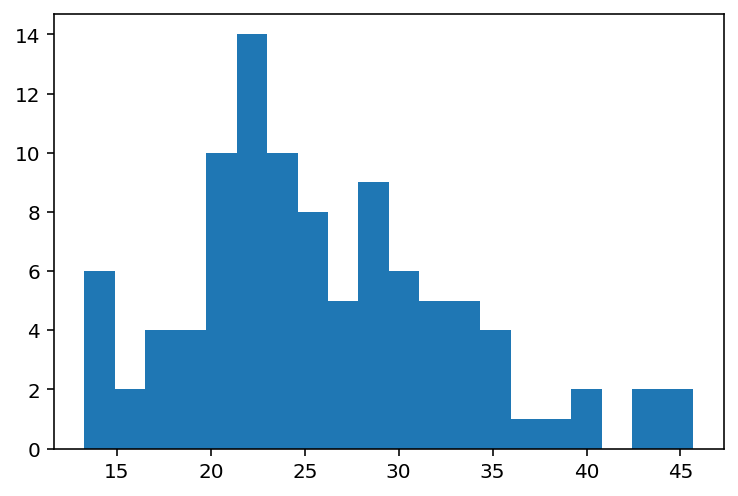

In [5]:
# Define custom functions
def chi_squared(ts, ys, mu_A_B):
    ys_fit = np.dot(A_matrix, mu_A_B)
    residual = ys - ys_fit
    return np.sum(np.square(residual / sigma))
    
def weighted_mean(ys, sigma):
    wts = 1.0/(sigma*sigma)
    return np.sum(wts*ys)/np.sum(wts)

Nloop = 100
chi2s_list = []

for i in range(Nloop):
    ys = ys_true + sigma*randn(len(ts))

#plot(ts, ys_true, '.')
#errorbar(ts, ys, yerr=sigma, fmt='.', color='k')

    f_test = 1

    A_matrix = column_stack((ones_like(ys), cos(2*pi*f_test*ts), sin(2*pi*f_test*ts)))

    ytilde = ys / sigma
    A_tilde = A_matrix / reshape(sigma, (len(ys), 1))
    ((mu, A, B), _, _, _) = np.linalg.lstsq(A_tilde, ytilde)

    mu_fit = weighted_mean(ys, sigma)

    chi2_fit = chi_squared(ts, ys, (mu,A,B))
    chi2_zero = chi_squared(ts, ys, (0,0,0))
    chi2_fit_mean = chi_squared(ts, ys, (mu_fit, 0, 0))

    chi2s_list.append(chi2_fit)

chi2s_list = array(chi2s_list)
# Print the array of chi-square values
print(chi2s_list)

# Generate a histogram of chi-square values
hist(chi2s_list, bins = 20)
show()

Ignore all the lines of code below this line

Re-phrase this as a fitting problem: 
$$
\vec{y} = \mathbf{A} \vec{x} + \vec{\epsilon}
$$
where
$$
\vec{x} = \begin{pmatrix}
\mu \\
A \\
B 
\end{pmatrix}
$$
is a vector of parameters, $\mathbf{A}$ is a "design matrix" whose columns are constant, cosine, and sine, and $\vec{\epsilon} \sim N(0,1)$ is the random noise we added.  We least-squares fit for $\vec{x}$.

In [11]:
    f_test = 1

    A_matrix = column_stack((ones_like(ys), cos(2*pi*f_test*ts), sin(2*pi*f_test*ts)))

    ytilde = ys / sigma
    A_tilde = A_matrix / reshape(sigma, (len(ys), 1))

In [12]:
    ((mu, A, B), _, _, _) = np.linalg.lstsq(A_tilde, ytilde)

c:\software\python\python3.7.4\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


Here we plot the data, and the least-squares fitted signal.  The code in the `title(...)` call computes $\chi^2$; you will need to break this out into a function that you call so you can save the $\chi^2$ value each time through the loop.

In [13]:
    def chi_squared(ts, ys, mu_A_B):
        ys_fit = np.dot(A_matrix, mu_A_B)
        residual = ys - ys_fit
        return np.sum(np.square(residual / sigma))

In [14]:
    #subplot(211)
    
    def weighted_mean(ys, sigma):
        wts = 1.0/(sigma*sigma)
        return np.sum(wts*ys)/np.sum(wts)

    mu_fit = weighted_mean(ys, sigma)

#errorbar(ts, ys, yerr=sigma, fmt='.', color='k')
#plot(ts, np.dot(A_matrix, (mu, A, B)))
#plot(ts, mu_fit*ones_like(ys))

    chi2_fit = chi_squared(ts, ys, (mu,A,B))
    chi2_zero = chi_squared(ts, ys, (0,0,0))
    chi2_fit_mean = chi_squared(ts, ys, (mu_fit, 0, 0))

    chi2s_list.append(chi2_fit_mean)

#title(r'$\Delta \chi^2 = {:.1f}$'.format(chi2_zero - chi2_fit))

#subplot(212)
#errorbar(ts, (ys-np.dot(A_matrix, (mu, A, B)))/sigma, yerr=ones_like(ys), fmt='.', color='k')

#print('Delta-chi2 going from no signal to mean + sinusoidal is {:.1f}'.format(chi2_zero - chi2_fit))
#print('Delta-chi2 going from constant signal to mean + sinusoidal is {:.1f}'.format(chi2_fit_mean - chi2_fit))
#print('Delta-chi2 going from no signal to constant signal is {:.1f}'.format(chi2_zero - chi2_fit_mean))

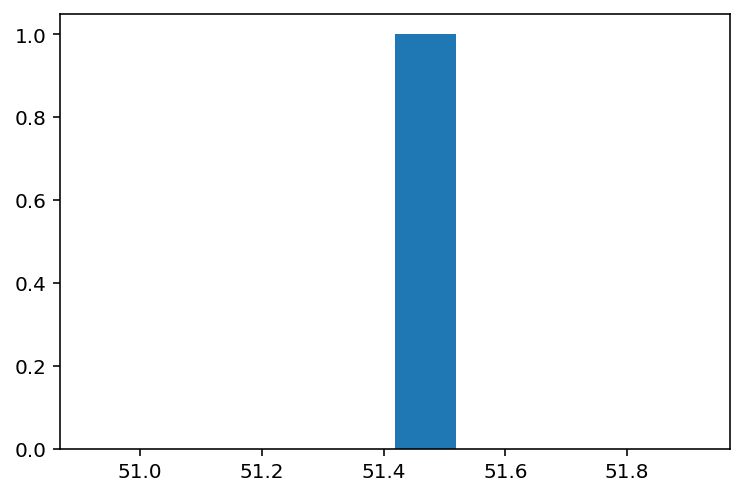

In [15]:
# Generate a histogram of chi-square values
chi2s_list = array(chi2s_list)

hist(chi2s_list, bins = 10)
show()

In [ ]:
Nloop = 100
chi2s = zeros(Nloop)
for i in range(Nloop):
    # Do stuff
    chi2s[i] = ...
    
chi2s_list = []
for i in range(Nloop):
    # Do stuff
    chi2s_list.append(...)
chi2s_list = array(chi2s_list)